In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Cargamos el DataSet


In [2]:
ruta_csv = "/content/SSNMX_catalogo_19800301_20220307.csv"

In [3]:
df_terre = pd.read_csv(ruta_csv, skiprows=4, skip_blank_lines=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_terre.head(4)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,1980-03-01,04:39:55,no calculable,16.64,-94.71,129.0,"22 km al NORESTE de UNION HIDALGO, OAX",1980-03-01,10:39:55,revisado
1,1980-03-01,12:56:11,no calculable,17.18,-102.34,33.0,"87 km al SUR de CD LAZARO CARDENAS, MICH",1980-03-01,18:56:11,revisado
2,1980-03-01,16:10:53,no calculable,15.41,-93.92,33.0,"77 km al SUR de TONALA, CHIS",1980-03-01,22:10:53,revisado
3,1980-03-02,03:23:30,4.8,14.84,-96.86,33.0,"109 km al SUROESTE de S PEDRO POCHUTLA, OAX",1980-03-02,09:23:30,revisado


# Manejo de Fechas

In [5]:
df_sample = df_terre['Fecha UTC'] + ' ' +df_terre['Hora UTC']


df_sample = df_sample.apply( lambda x: pd.to_datetime(x, errors='coerce') )


df_terre['Fecha y Hora UTC'] = df_sample

In [6]:
df_terre.drop(
    columns = ['Fecha', 'Hora', 'Fecha UTC', 'Hora UTC'],
    inplace= True
)

# Eliminamos los datos faltantes

In [7]:
df_terre.dropna(inplace=True)

# Agregamos el Año y Estado

In [8]:
df_terre.dtypes

Magnitud                              object
Latitud                              float64
Longitud                             float64
Profundidad                           object
Referencia de localizacion            object
Estatus                               object
Fecha y Hora UTC              datetime64[ns]
dtype: object

In [9]:
def acronimos(estado):
  patron = '(.+,)(\ [A-Z]{2,4})'
  acro = re.search(pattern=patron, string=estado)
  if acro is not None:
    return acro.group(2)
  else:
    return None

def esp_blanco(x):
  patron = '(\s)(.+)'
  xelimi = re.search(pattern=patron, string=x)

  if xelimi is not None:
    return xelimi.group(2)
  else:
    return None

In [10]:
df_terre['Estado'] = df_terre['Referencia de localizacion'].apply(
    lambda x: acronimos(str(x)),
    lambda x: esp_blanco(str(x))
)

In [11]:
df_terre['Estado'][2]

' CHIS'

In [12]:
df_terre['Estado'].value_counts()

 OAX     98856
 CHIS    44377
 GRO     42165
 MICH    14506
 BC       9660
 JAL      7744
 COL      6071
 VER      5442
 BCS      3023
 SON      2095
 PUE      1191
 SIN      1034
 MEX       599
 HGO       572
 TAB       543
 NL        447
 CHIH      400
 CDMX      292
 ZAC       279
 NAY       264
 MOR       251
 SLP       198
 COAH      126
 TAMS      124
 TLAX      120
 GTO       103
 QR         84
 DGO        63
 CAMP       62
 AGS        45
 QRO        15
 YUC         3
Name: Estado, dtype: int64

In [13]:
df_terre['Año'] = df_terre['Fecha y Hora UTC'].apply(lambda x: x.year)

In [14]:
df_terre.reindex(
    columns = [
      'Referencia de localizacion','Estado','Fecha y Hora UTC',
      'Año', 'Estatus','Magnitud','Latitud','Profundidad'      
    ]
).sample(5)

,Referencia de localizacion,Estado,Fecha y Hora UTC,Año,Estatus,Magnitud,Latitud,Profundidad
60351,"69 km al ESTE de SANTA ROSALIA, BCS",BCS,2014-04-04 18:48:46,2014,revisado,3.6,27.4405,2.0
60494,"48 km al NORESTE de SAN MARCOS, GRO",GRO,2014-04-16 09:11:30,2014,revisado,3.9,16.9592,27.0
238220,"20 km al NOROESTE de RIO GRANDE, OAX",OAX,2022-02-03 21:59:48,2022,verificado,3.3,16.1400,16.0
39986,"56 km al SUROESTE de MAPASTEPEC, CHIS",CHIS,2009-10-12 12:22:47,2009,revisado,3.8,15.1400,77.0
93177,"54 km al NORTE de RIO GRANDE, OAX",OAX,2017-01-04 21:42:45,2017,revisado,3.5,16.5003,4.3


# Seaborn

In [15]:
df_terre.reindex(
    columns = [
      'Referencia de localizacion','Estado','Fecha y Hora UTC',
      'Año', 'Estatus','Magnitud','Latitud','Profundidad'      
    ]
).sample(5)

,Referencia de localizacion,Estado,Fecha y Hora UTC,Año,Estatus,Magnitud,Latitud,Profundidad
57539,"48 km al OESTE de SANTA ROSALIA, CHIH",CHIH,2013-10-11 19:15:00,2013,revisado,4.1,27.5988,5.0
99006,"73 km al SUR de COALCOMAN, MICH",MICH,2017-05-29 07:51:57,2017,revisado,3.6,18.1200,12.1
170980,"19 km al NOROESTE de VILLA DE ALVAREZ, COL",COL,2019-10-17 16:11:34,2019,revisado,3.6,19.4210,21.9
213898,"45 km al SUR de OMETEPEC, GRO",GRO,2021-04-06 14:01:35,2021,revisado,3.3,16.2828,14.6
54533,"22 km al SUROESTE de OMETEPEC, GRO",GRO,2013-03-22 02:21:31,2013,revisado,3.8,16.4933,15.6


### Distribucion de Terrmotos por Años

<Figure size 1008x576 with 0 Axes>

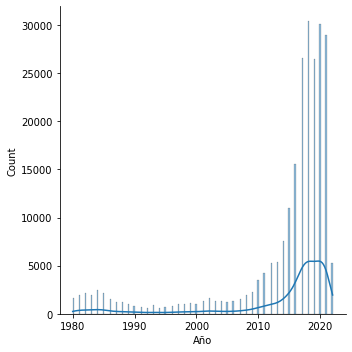

In [16]:
plt.figure(figsize=(14,8))

sns.displot(
    df_terre,
    x = 'Año',
    kde = True
)

### Counteo de terremotos por Estado

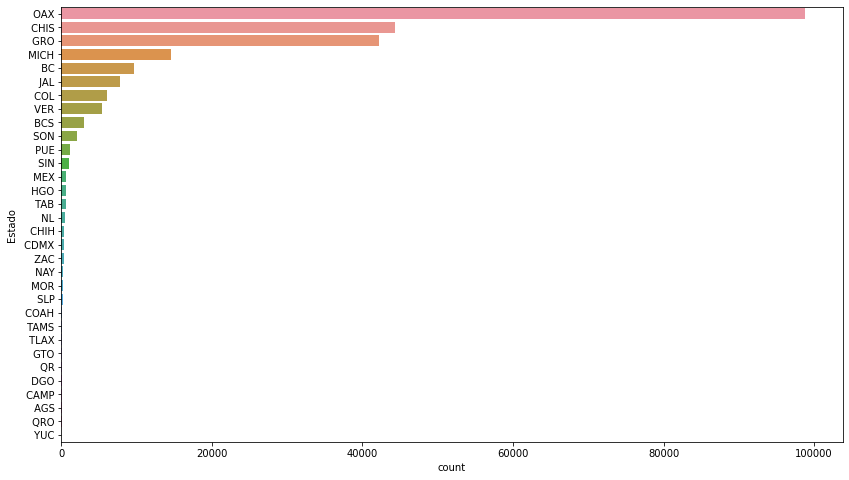

In [17]:
plt.figure(figsize=(14,8))

sns.countplot(
    data= df_terre,
    y= 'Estado',
    order= df_terre['Estado'].value_counts().index
)

In [18]:
idx_est = df_terre['Estado'].isin([' NL'])
df_NL = df_terre[idx_est]

# Categarorizamos Variables

In [19]:
df_terre.dtypes

Magnitud                              object
Latitud                              float64
Longitud                             float64
Profundidad                           object
Referencia de localizacion            object
Estatus                               object
Fecha y Hora UTC              datetime64[ns]
Estado                                object
Año                                    int64
dtype: object

In [20]:
df_terre['Estado'] = pd.Categorical(
    df_terre['Estado'].apply(str)
)

df_terre['Año'] = pd.Categorical(
    df_terre['Año'].apply(int)
)

df_terre['Estatus'] = pd.Categorical(
    df_terre['Estatus'].apply(str)
)

In [21]:
df_terre.dtypes

Magnitud                              object
Latitud                              float64
Longitud                             float64
Profundidad                           object
Referencia de localizacion            object
Estatus                             category
Fecha y Hora UTC              datetime64[ns]
Estado                              category
Año                                 category
dtype: object

# Creamos un Subset

In [22]:
idx_filtro = df_terre['Estado'].isin([' NL', ' QR'])

df_sample = df_terre[idx_filtro]

df_sample.sample(4)

,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Estatus,Fecha y Hora UTC,Estado,Año
92860,3.7,25.1773,-100.3260,5.0,"33 km al SUROESTE de SANTIAGO, NL",revisado,2016-12-29 08:47:02,NL,2016
220266,3.6,25.2485,-99.1835,10.0,"58 km al NORESTE de LINARES, NL",revisado,2021-07-05 09:08:08,NL,2021
5447,no calculable,18.1100,-88.6800,33.0,"59 km al SUROESTE de CHETUMAL, QR",revisado,1982-12-02 05:23:13,QR,1982
51191,3.4,24.8615,-99.5887,38.8,"2 km al OESTE de LINARES, NL",revisado,2012-07-24 11:25:47,NL,2012


In [23]:
df_sample.shape

(531, 9)

In [24]:
df_sample.dtypes

Magnitud                              object
Latitud                              float64
Longitud                             float64
Profundidad                           object
Referencia de localizacion            object
Estatus                             category
Fecha y Hora UTC              datetime64[ns]
Estado                              category
Año                                 category
dtype: object

In [25]:
# df_sample = df_sample.set_index(['Estado', 'Año']).sort_index()
df_sample = df_sample.set_index(['Estado', 'Estatus', 'Año']).sort_index()

## Subset que ordenamos por categorias: Estado -> Estatus -> Año

In [26]:
df_sample.head(10)

Magnitud  Latitud  Longitud Profundidad  \
Estado Estatus  Año                                                  
 NL    revisado 1986            4.5    24.83   -100.22         9.0   
                1986            3.7    24.50   -100.01         9.0   
                1991  no calculable    25.92   -100.43         5.0   
                1992            4.3    24.70    -99.84        10.0   
                2000            4.2    24.62    -99.93        33.0   
                2004            4.5    25.22    -99.54        11.0   
                2006            4.3    25.49   -100.23        16.0   
                2006            4.1    25.25   -100.28        20.0   
                2009            4.4    25.29    -99.33        18.0   
                2009            3.5    24.89   -100.26        20.0   

                                  Referencia de localizacion  \
Estado Estatus  Año                                            
 NL    revisado 1986  54 km al SUROESTE de CD DE ALLENDE, NL   
                1986        60 km al SUROESTE de LINARES, NL   
                1991          6 km al SURESTE de HIDALGO, NL   
                1992        33 km al SUROESTE de LINARES, NL   
                2000        45 km al SUROESTE de LINARES, NL   
                2004       29 km al ESTE de MONTEMORELOS, NL   
                2006       11 km al NOROESTE de SANTIAGO, NL   
                2006       23 km al SUROESTE de SANTIAGO, NL   
                2009       51 km al ESTE de MONTEMORELOS, NL   
                2009  50 km al SUROESTE de CD DE ALLENDE, NL   

                        Fecha y Hora UTC  
Estado Estatus  Año                       
 NL    revisado 1986 1986-02-26 22:49:56  
                1986 1986-06-08 08:52:55  
                1991 1991-11-16 03:39:01  
                1992 1992-07-30 14:40:55  
                2000 2000-09-20 06:24:59  
                2004 2004-04-06 19:01:01  
                2006 2006-04-17 16:25:10  
                2006 2006-04-17 16:58:04  
                2009 2009-06-14 11:04:06  
                2009 2009-06-20 08:56:16

In [27]:
ids = pd.IndexSlice

df_sample

Magnitud  Latitud  Longitud Profundidad  \
Estado Estatus  Año                                                  
 NL    revisado 1986            4.5  24.8300 -100.2200         9.0   
                1986            3.7  24.5000 -100.0100         9.0   
                1991  no calculable  25.9200 -100.4300         5.0   
                1992            4.3  24.7000  -99.8400        10.0   
                2000            4.2  24.6200  -99.9300        33.0   
...                             ...      ...       ...         ...   
 QR    revisado 2012            4.4  15.8322  -88.4172        10.0   
                2013            5.4  15.8648  -87.0532        10.0   
                2013            4.7  15.5658  -86.0355        10.0   
                2014            4.3  16.1238  -88.7430         3.0   
                2015            4.2  20.3183  -87.5048         5.0   

                                     Referencia de localizacion  \
Estado Estatus  Año                                               
 NL    revisado 1986     54 km al SUROESTE de CD DE ALLENDE, NL   
                1986           60 km al SUROESTE de LINARES, NL   
                1991             6 km al SURESTE de HIDALGO, NL   
                1992           33 km al SUROESTE de LINARES, NL   
                2000           45 km al SUROESTE de LINARES, NL   
...                                                         ...   
 QR    revisado 2012              296 km al SUR de CHETUMAL, QR   
                2013          321 km al SURESTE de CHETUMAL, QR   
                2013          405 km al SURESTE de CHETUMAL, QR   
                2014              267 km al SUR de CHETUMAL, QR   
                2015  56 km al SUROESTE de PLAYA DEL CARMEN, QR   

                        Fecha y Hora UTC  
Estado Estatus  Año                       
 NL    revisado 1986 1986-02-26 22:49:56  
                1986 1986-06-08 08:52:55  
                1991 1991-11-16 03:39:01  
                1992 1992-07-30 14:40:55  
                2000 2000-09-20 06:24:59  
...                                  ...  
 QR    revisado 2012 2012-05-11 06:14:58  
                2013 2013-04-10 19:13:59  
                2013 2013-08-24 18:58:47  
                2014 2014-01-14 03:06:54  
                2015 2015-01-12 03:49:16  

[531 rows x 6 columns]

# Seaborn NL

In [28]:
df_NL.head()

,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Estatus,Fecha y Hora UTC,Estado,Año
12661,4.5,24.83,-100.22,9.0,"54 km al SUROESTE de CD DE ALLENDE, NL",revisado,1986-02-26 22:49:56,NL,1986
13128,3.7,24.50,-100.01,9.0,"60 km al SUROESTE de LINARES, NL",revisado,1986-06-08 08:52:55,NL,1986
18603,no calculable,25.92,-100.43,5.0,"6 km al SURESTE de HIDALGO, NL",revisado,1991-11-16 03:39:01,NL,1991
19044,4.3,24.70,-99.84,10.0,"33 km al SUROESTE de LINARES, NL",revisado,1992-07-30 14:40:55,NL,1992
26260,4.2,24.62,-99.93,33.0,"45 km al SUROESTE de LINARES, NL",revisado,2000-09-20 06:24:59,NL,2000


In [29]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 12661 to 237205
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Magnitud                    447 non-null    object        
 1   Latitud                     447 non-null    float64       
 2   Longitud                    447 non-null    float64       
 3   Profundidad                 447 non-null    object        
 4   Referencia de localizacion  447 non-null    object        
 5   Estatus                     447 non-null    object        
 6   Fecha y Hora UTC            447 non-null    datetime64[ns]
 7   Estado                      447 non-null    object        
 8   Año                         447 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 34.9+ KB


### Distribucion por Años de Terremotos en NL

<Figure size 1008x576 with 0 Axes>

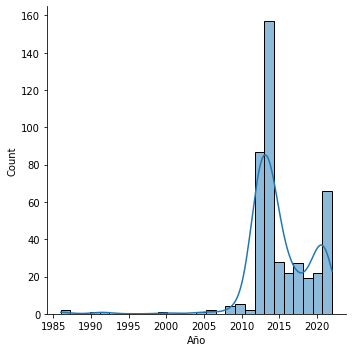

In [30]:
plt.figure(figsize=(14,8))

sns.displot(
    df_NL,
    x = 'Año',
    kde = True
)

In [31]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 12661 to 237205
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Magnitud                    447 non-null    object        
 1   Latitud                     447 non-null    float64       
 2   Longitud                    447 non-null    float64       
 3   Profundidad                 447 non-null    object        
 4   Referencia de localizacion  447 non-null    object        
 5   Estatus                     447 non-null    object        
 6   Fecha y Hora UTC            447 non-null    datetime64[ns]
 7   Estado                      447 non-null    object        
 8   Año                         447 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 51.1+ KB


### Conteo de Terremotos por Años de NL

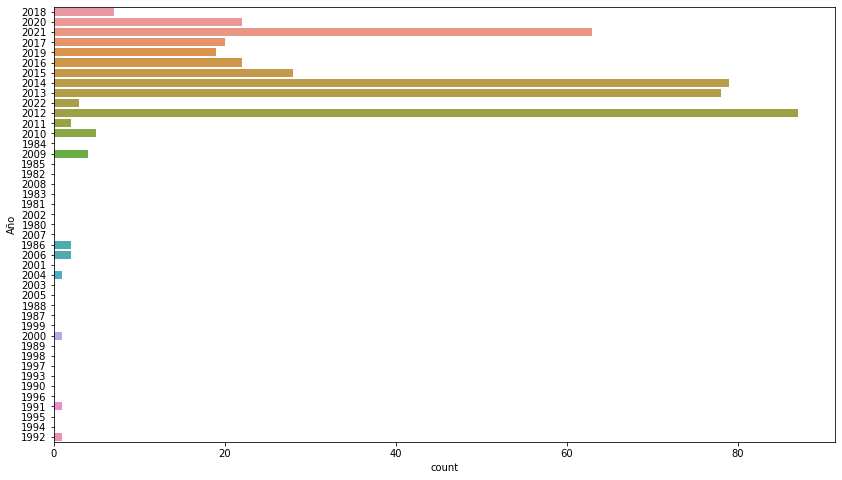

In [32]:
plt.figure(figsize=(14,8))

sns.countplot(
    data= df_NL,
    y= 'Año',
    order= df_terre['Año'].value_counts().index
)

# Crecion de la Columna Municipio

In [33]:
df_NL['Referencia de localizacion'].head(20)

12661     54 km al SUROESTE de CD DE ALLENDE, NL
13128           60 km al SUROESTE de LINARES, NL
18603             6 km al SURESTE de HIDALGO, NL
19044           33 km al SUROESTE de LINARES, NL
26260           45 km al SUROESTE de LINARES, NL
31215          29 km al ESTE de MONTEMORELOS, NL
33768          11 km al NOROESTE de SANTIAGO, NL
33769          23 km al SUROESTE de SANTIAGO, NL
39250          51 km al ESTE de MONTEMORELOS, NL
39277     50 km al SUROESTE de CD DE ALLENDE, NL
39278     52 km al SUROESTE de CD DE ALLENDE, NL
39290     37 km al SUROESTE de CD DE ALLENDE, NL
40680    5 km al SUR de S PEDRO GARZA GARCIA, NL
42031     78 km al SUROESTE de CD DE ALLENDE, NL
42259          4 km al OESTE de MONTEMORELOS, NL
42922            58 km al NORESTE de LINARES, NL
43240            54 km al NORESTE de LINARES, NL
47011            25 km al NORESTE de LINARES, NL
47044       16 km al SURESTE de MONTEMORELOS, NL
50390          17 km al SUR de CD DE ALLENDE, NL
Name: Referencia de 

In [34]:
def municipio(referencia):
  patron= r"(\w+\skm\sal\s\w+\sde\s)(.+)(,\s.+)"

  municipio = re.search(pattern=patron, string=referencia)
  
  if municipio is not None:
    return municipio.group(2)
  else:
    return None

In [35]:
df_NL['Municipio'] = df_NL['Referencia de localizacion'].apply(
    lambda x: municipio(str(x)),
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df_NL.sample(10)

,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Estatus,Fecha y Hora UTC,Estado,Año,Municipio
51193,3.3,24.8070,-99.8055,20.0,"25 km al OESTE de LINARES, NL",revisado,2012-07-24 14:30:41,NL,2012,LINARES
216743,3.6,24.8477,-99.4038,5.0,"17 km al ESTE de LINARES, NL",revisado,2021-05-23 00:56:57,NL,2021,LINARES
51161,3.1,25.0028,-99.0127,20.0,"58 km al NORESTE de LINARES, NL",revisado,2012-07-22 19:06:21,NL,2012,LINARES
227715,3.9,24.6298,-100.3720,3.0,"81 km al SUROESTE de CD DE ALLENDE, NL",revisado,2021-10-04 21:50:05,NL,2021,CD DE ALLENDE
51379,3.2,24.9737,-99.7700,20.0,"24 km al NOROESTE de LINARES, NL",revisado,2012-08-09 23:42:37,NL,2012,LINARES
51219,3.4,25.1337,-99.2242,20.0,"46 km al NORESTE de LINARES, NL",revisado,2012-07-26 00:28:05,NL,2012,LINARES
58105,3.4,25.5832,-99.5318,20.0,"47 km al ESTE de CADEREYTA JIMENEZ, NL",revisado,2013-11-18 08:57:53,NL,2013,CADEREYTA JIMENEZ
62053,3.7,25.5255,-99.4050,10.0,"57 km al NORESTE de MONTEMORELOS, NL",revisado,2014-06-29 00:24:02,NL,2014,MONTEMORELOS
33768,4.3,25.4900,-100.2300,16.0,"11 km al NOROESTE de SANTIAGO, NL",revisado,2006-04-17 16:25:10,NL,2006,SANTIAGO
42031,3.9,24.6300,-100.3000,3.0,"78 km al SUROESTE de CD DE ALLENDE, NL",revisado,2010-05-26 08:11:47,NL,2010,CD DE ALLENDE


### Conteo de Terremotos por Municipios en el Estado

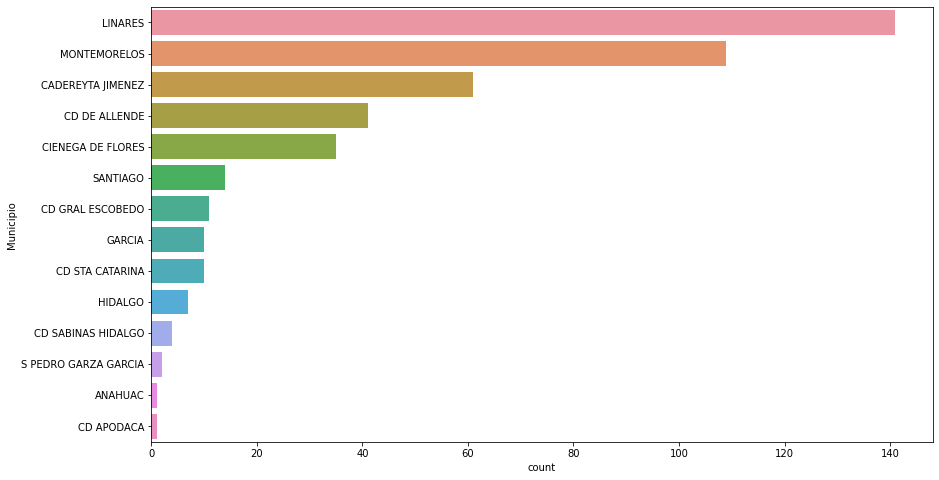

In [37]:
plt.figure(figsize=(14,8))

sns.countplot(
    data= df_NL,
    y= 'Municipio',
    order= df_NL['Municipio'].value_counts().index
)